# Patterns and Constructions

In [15]:
from nltk.chunk.regexp import tag_pattern2re_pattern
from nltk.chunk import RegexpParser
from nltk.corpus import brown
import nltk
tag_pattern2re_pattern('<DT>?<NN.*>+')

'(<(DT)>)?(<(NN[^\\{\\}<>]*)>)+'

(S
  (NP The/DT article/NN)
  looks/VBZ
  (NP like/IN a/DT work/NN)
  written/VBN
  (NP by/IN a/DT foreigner/NN)
  ./.)


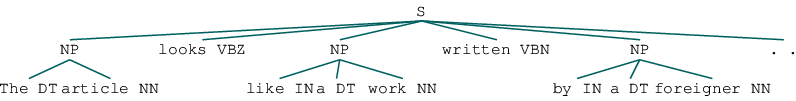

In [23]:
chunker = RegexpParser('''
NP:
    {<DT><NN.*><.*>*<NN.*>}
    }<VB.*>{
''')

#sent = brown.tagged_sents()[10]
#chunker.parse(sent)

sent = 'The article looks like a work written by a foreigner.'
sent = nltk.pos_tag(nltk.word_tokenize(sent))
sent_ct = chunker.parse(sent)
print(sent_ct)


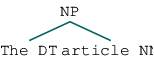

In [76]:
sent_ct.productions()
#sent_ct.chomsky_normal_form()
sent_ct
sent_ct[0]

In [68]:
print(type(sent_ct[0].label))
print(sent_ct[0])
print(type(sent_ct[0].leaves))
print(type(sent_ct[1]))
type(sent_ct[2])

<class 'method'>
(NP The/DT article/NN)
<class 'method'>
<class 'tuple'>


nltk.tree.Tree

In [78]:
i=0
for subtree in sent_ct.subtrees():
    i=i+1
    print(str(i))
    print('label: {}'.format(subtree.label()))
    print(subtree)

1
label: S
(S
  (NP The/DT article/NN)
  looks/VBZ
  (NP like/IN a/DT work/NN)
  written/VBN
  (NP by/IN a/DT foreigner/NN)
  ./.)
2
label: NP
(NP The/DT article/NN)
3
label: NP
(NP like/IN a/DT work/NN)
4
label: NP
(NP by/IN a/DT foreigner/NN)


In [103]:
str(sent_ct)

'(S\n  (NP The/DT article/NN)\n  looks/VBZ\n  (NP like/IN a/DT work/NN)\n  written/VBN\n  (NP by/IN a/DT foreigner/NN)\n  ./.)'

In [80]:
for subtree in sent_ct.subtrees(filter=lambda t: t.label().endswith("NP")):
    print(subtree)

(NP The/DT article/NN)
(NP like/IN a/DT work/NN)
(NP by/IN a/DT foreigner/NN)


In [106]:
# write chunk rules
pat_chunker = RegexpParser('''
ADJ_AND_ADJ:
    {<JJ.*><CC><JJ.*>}
''')

for sent in brown.tagged_sents()[:500]:
    cur_t = pat_chunker.parse(sent)
    cur_pat = [pat for pat in cur_t.subtrees(filter=lambda t: t.label().startswith("ADJ_AND"))]
    if len(cur_pat)>0:
        print(cur_pat)
    

[Tree('ADJ_AND_ADJ', [('outmoded', 'JJ'), ('or', 'CC'), ('inadequate', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('fair', 'JJ'), ('and', 'CC'), ('equitable', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('rural', 'JJ'), ('and', 'CC'), ('urban', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('junior', 'JJ'), ('or', 'CC'), ('senior', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('ambitious', 'JJ'), ('and', 'CC'), ('costly', 'JJ')]), Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('medical', 'JJ'), ('and', 'CC'), ('dental', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('tentative', 'JJ'), ('and', 'CC'), ('exploratory', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('military', 'JJ'), ('and', 'CC'), ('economic', 'JJ')])]
[Tree('ADJ_AND_ADJ', [('firmer', 'JJR'), ('and', 'CC'), ('tougher', 'JJR')])]
[Tree('ADJ_AND_ADJ', [('amateurish', 'JJ'), ('and', 'CC'), ('monumental', 'J